In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = "../data/cifar_r50"
model_exts = ["adv_train", "robust_train", "train"]
data_files = ['class_dims_test', 'classwise_acc_e0.0', 'classwise_acc_e0.1', 'classwise_acc_e0.2']

def load_data(model_ext, data_ext):
    with open(f"{data_path}_{model_ext}/{data_ext}.pkl", "rb") as f:
        return pickle.load(f)
    
std_class_acc = load_data("train", "classwise_acc_e0.0")
adv_class_acc = load_data("adv_train", "classwise_acc_e0.0")
robust_class_acc = load_data("robust_train", "classwise_acc_e0.0")

In [4]:
std_avg_acc = np.mean([std_class_acc[key] for key in std_class_acc])
adv_avg_acc = np.mean([adv_class_acc[key] for key in adv_class_acc])
robust_avg_acc = np.mean([robust_class_acc[key] for key in robust_class_acc])


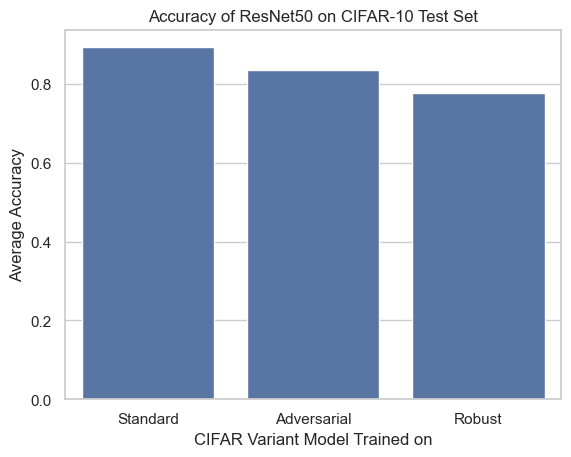

In [8]:
plot1_data = {
    "Model": ["Standard", "Adversarial", "Robust"],
    "Average Accuracy": [std_avg_acc, adv_avg_acc, robust_avg_acc]
}

sns.set_theme(style="whitegrid")
fig = sns.barplot(x="Model", y="Average Accuracy", data=plot1_data)
plt.title("Accuracy of ResNet50 on CIFAR-10 Test Set")
# set axis labels
plt.xlabel("CIFAR Variant Model Trained on")
plt.show()


In [9]:
std_cam_dims = load_data("train", "class_dims_test")
adv_cam_dims = load_data("adv_train", "class_dims_test")
robust_cam_dims = load_data("robust_train", "class_dims_test")

In [14]:
std_cam_dims

{0: np.float64(8.942107508767105),
 1: np.float64(9.078546251577922),
 2: np.float64(9.154245609991019),
 3: np.float64(9.509208015009486),
 4: np.float64(9.440285587058753),
 5: np.float64(9.018700995283604),
 6: np.float64(9.354201652536739),
 7: np.float64(8.782268885026186),
 8: np.float64(9.383259648146867),
 9: np.float64(9.108978882933746),
 'all': np.float64(10.091687789379458)}

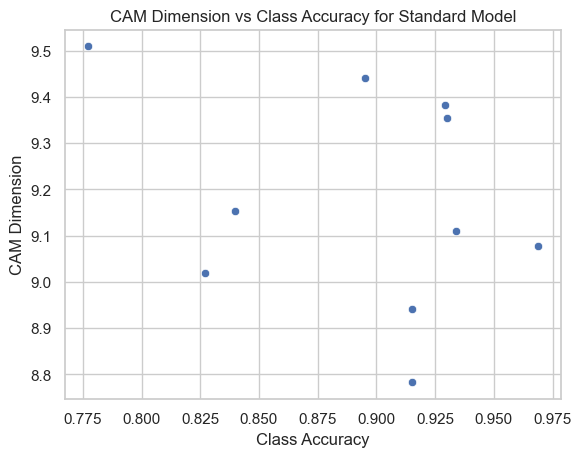

In [21]:
std_df = pd.DataFrame(index=np.arange(10), columns=["Class Accuracy", "CAM Dimension"])
std_df["Class Accuracy"] = [std_class_acc[key] for key in std_class_acc ]
# first 10 keys are classwise dims
std_df["CAM Dimension"] = [std_cam_dims[key] for key in range(10)]
# plot 2
sns.set_theme(style="whitegrid")
fig = sns.scatterplot(x="Class Accuracy", y="CAM Dimension", data=std_df)
plt.title("CAM Dimension vs Class Accuracy for Standard Model")
plt.show()

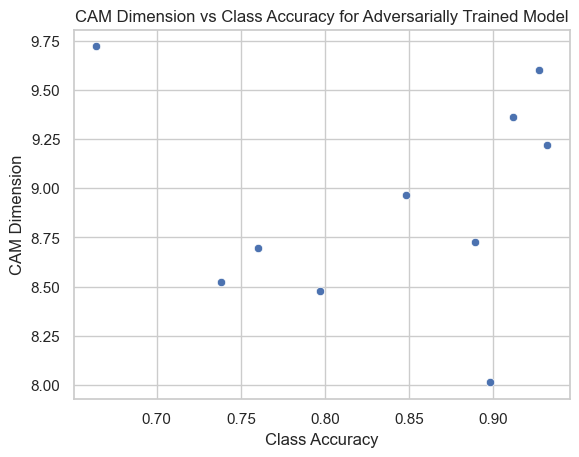

In [20]:
adv_df = pd.DataFrame(index=np.arange(10), columns=["Class Accuracy", "CAM Dimension"])
adv_df["Class Accuracy"] = [adv_class_acc[key] for key in adv_class_acc ]
# first 10 keys are classwise dims
adv_df["CAM Dimension"] = [adv_cam_dims[key] for key in range(10)]
# plot 2
sns.set_theme(style="whitegrid")
fig = sns.scatterplot(x="Class Accuracy", y="CAM Dimension", data=adv_df)
plt.title("CAM Dimension vs Class Accuracy for Adversarially Trained Model")
plt.show()


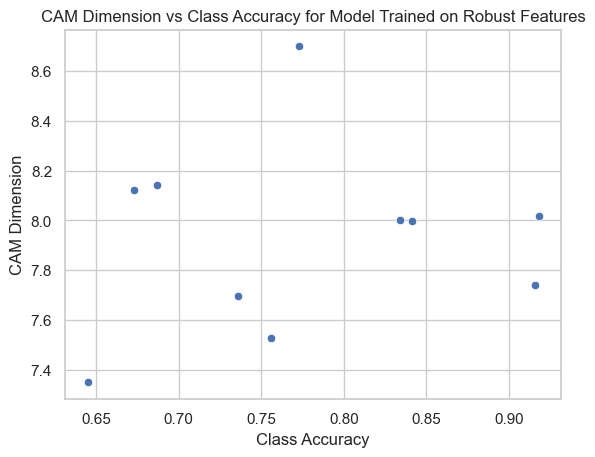

In [23]:
robust_df = pd.DataFrame(index=np.arange(10), columns=["Class Accuracy", "CAM Dimension"])
robust_df["Class Accuracy"] = [robust_class_acc[key] for key in robust_class_acc ]
# first 10 keys are classwise dims
robust_df["CAM Dimension"] = [robust_cam_dims[key] for key in range(10)]
# plot 2
sns.set_theme(style="whitegrid")
fig = sns.scatterplot(x="Class Accuracy", y="CAM Dimension", data=robust_df)
plt.title("CAM Dimension vs Class Accuracy for Model Trained on Robust Features")
plt.show()

In [40]:
eps = 0.2
std_adv_acc = load_data("train", f"classwise_acc_e{eps}")
advt_adv_acc = load_data("adv_train", f"classwise_acc_e{eps}")
robust_adv_acc = load_data("robust_train", f"classwise_acc_e{eps}")

In [29]:
# add column to  dfs
std_df["Adversarial Accuracy"] = [std_adv_acc[key] for key in std_adv_acc]
adv_df["Adversarial Accuracy"] = [advt_adv_acc[key] for key in advt_adv_acc]
robust_df["Adversarial Accuracy"] = [robust_adv_acc[key] for key in robust_adv_acc]
std_df

,Class Accuracy,CAM Dimension,Adversarial Accuracy
0,0.915,8.942108,0.326
1,0.969,9.078546,0.711
2,0.840,9.154246,0.228
3,0.777,9.509208,0.167
4,0.895,9.440286,0.279
5,0.827,9.018701,0.271
6,0.930,9.354202,0.496
7,0.915,8.782269,0.466
8,0.929,9.383260,0.490
9,0.934,9.108979,0.591


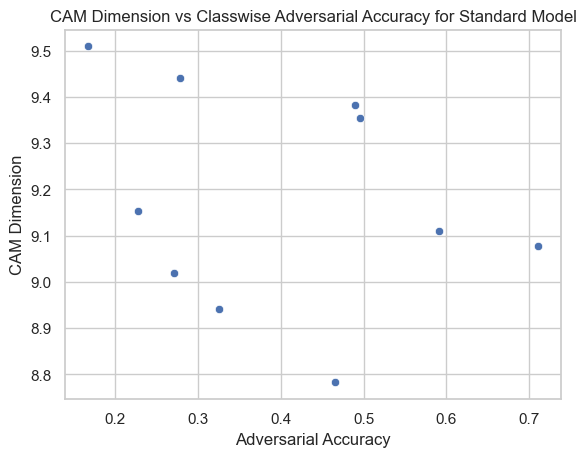

In [33]:
# plot 3
sns.set_theme(style="whitegrid")
fig = sns.scatterplot(x="Adversarial Accuracy", y="CAM Dimension", data=std_df)
plt.title("CAM Dimension vs Classwise Adversarial Accuracy for Standard Model")
plt.show()

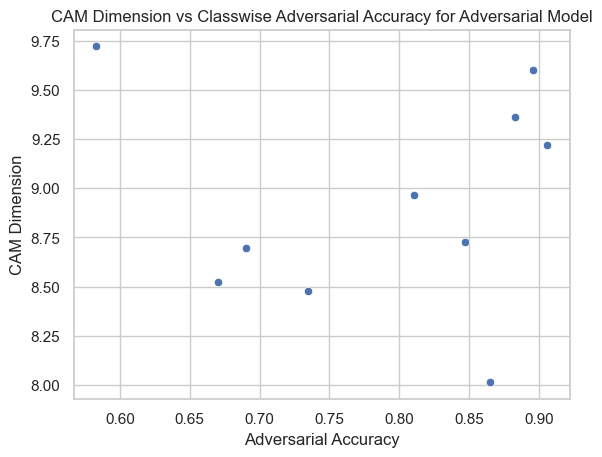

In [34]:
sns.set_theme(style="whitegrid")
fig = sns.scatterplot(x="Adversarial Accuracy", y="CAM Dimension", data=adv_df)
plt.title("CAM Dimension vs Classwise Adversarial Accuracy for Adversarial Model")
plt.show()


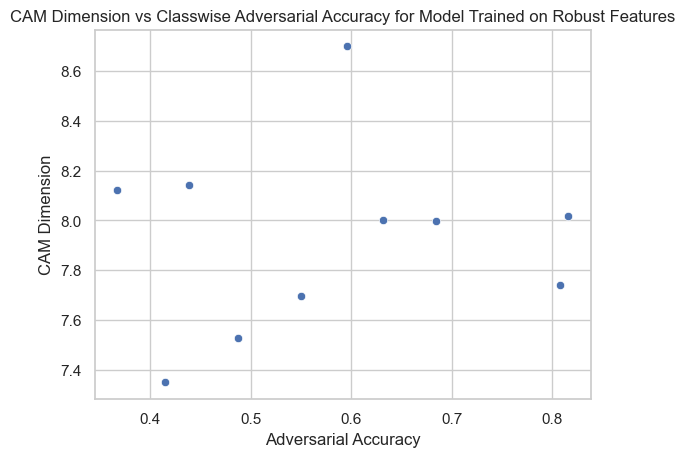

In [35]:
sns.set_theme(style="whitegrid")
fig = sns.scatterplot(x="Adversarial Accuracy", y="CAM Dimension", data=robust_df)
plt.title("CAM Dimension vs Classwise Adversarial Accuracy for Model Trained on Robust Features")
plt.show()


In [41]:
all_models_data = {
    "Model": ["Standard", "Adversarial", "Robust"],
    "Average Accuracy": [std_avg_acc, adv_avg_acc, robust_avg_acc],
    "Average Adversarial Accuracy": [np.mean([std_adv_acc[key] for key in std_adv_acc]), np.mean([advt_adv_acc[key] for key in advt_adv_acc]), np.mean([robust_adv_acc[key] for key in robust_adv_acc])],
    "Reprsentaion Dimension": [std_cam_dims['all'], adv_cam_dims['all'], robust_cam_dims['all']]
}

all_models_df = pd.DataFrame(all_models_data)
all_models_df

,Model,Average Accuracy,Average Adversarial Accuracy,Reprsentaion Dimension
0,Standard,0.8931,0.0924,10.091688
1,Adversarial,0.8365,0.7402,10.702298
2,Robust,0.7779,0.3803,9.324263


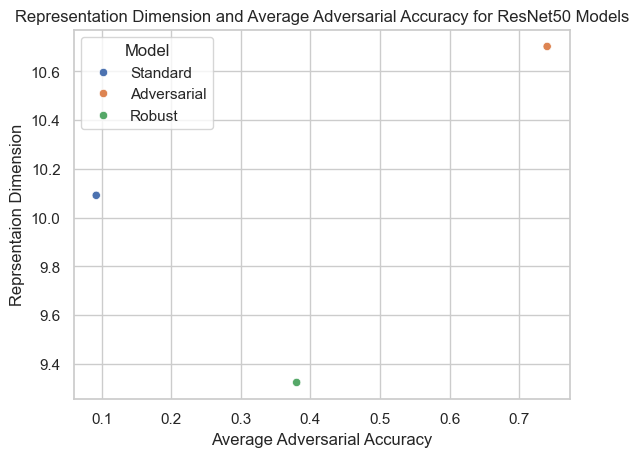

In [45]:
# plot 4 - scatter of adv acc and rep dim
sns.set_theme(style="whitegrid")
fig = sns.scatterplot(x="Average Adversarial Accuracy", y="Reprsentaion Dimension", data=all_models_df, hue="Model")
plt.title("Representation Dimension and Average Adversarial Accuracy for ResNet50 Models")
plt.show()